In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

# --- Block 1: Load Dataset ---
try:
    df = pd.read_csv('daily_food_nutrition_dataset.csv')
    print("✅ Dataset loaded successfully.")
except FileNotFoundError:
    print("❌ Error: daily_food_nutrition_dataset.csv not found.")
    exit()


✅ Dataset loaded successfully.


In [5]:
# --- Block 2: Clean Numerical Data ---
numerical_cols = [
    'Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)', 'Fat (g)',
    'Fiber (g)', 'Sugars (g)', 'Sodium (mg)', 'Cholesterol (mg)'
]

# Convert to numeric types and drop rows with invalid entries
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(subset=numerical_cols, inplace=True)

# Round and sanitize 'Sugars (g)' for Poisson-style modeling
df['Sugars (g)'] = df['Sugars (g)'].apply(lambda x: max(0, round(x)))

print("✅ Numerical columns cleaned and ready.")


✅ Numerical columns cleaned and ready.



--- Parametric vs Non-Parametric Bootstrapping: Sugars (g) ---


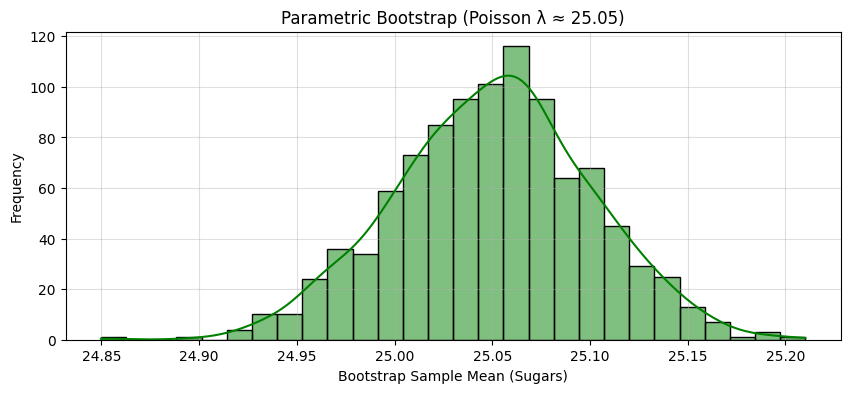

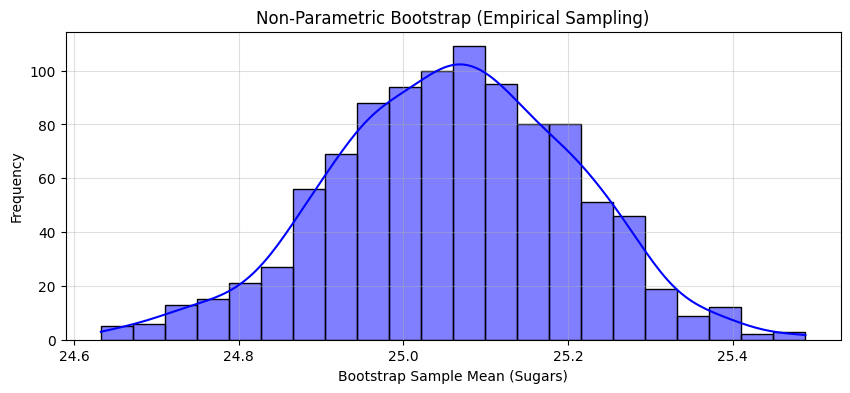

In [6]:
print("\n--- Parametric vs Non-Parametric Bootstrapping: Sugars (g) ---")

# Use rounded 'Sugars (g)' as count-like variable
observed_sugar_counts = df['Sugars (g)'].astype(int)

# --- Parametric Bootstrapping (Assume Poisson Distribution) ---
lambda_hat = observed_sugar_counts.mean()
parametric_samples = [
    np.random.poisson(lambda_hat, size=len(observed_sugar_counts)).mean()
    for _ in range(1000)
]

plt.figure(figsize=(10, 4))
sns.histplot(parametric_samples, kde=True, color='green')
plt.title('Parametric Bootstrap (Poisson λ ≈ {:.2f})'.format(lambda_hat))
plt.xlabel('Bootstrap Sample Mean (Sugars)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.4)
plt.show()

# --- Non-Parametric Bootstrapping (Resample from Data) ---
nonparametric_samples = [
    np.random.choice(observed_sugar_counts, size=len(observed_sugar_counts), replace=True).mean()
    for _ in range(1000)
]

plt.figure(figsize=(10, 4))
sns.histplot(nonparametric_samples, kde=True, color='blue')
plt.title('Non-Parametric Bootstrap (Empirical Sampling)')
plt.xlabel('Bootstrap Sample Mean (Sugars)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.4)
plt.show()
